# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

00:47:22 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=628504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=956363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=330137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=796676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=106404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=362015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=606427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=372583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=721343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=37323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=138672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=625675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=697041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=926980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=447540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=404081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=512391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=283335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

00:47:24 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=906125;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=494793;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

00:47:25 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=319675;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=708622;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

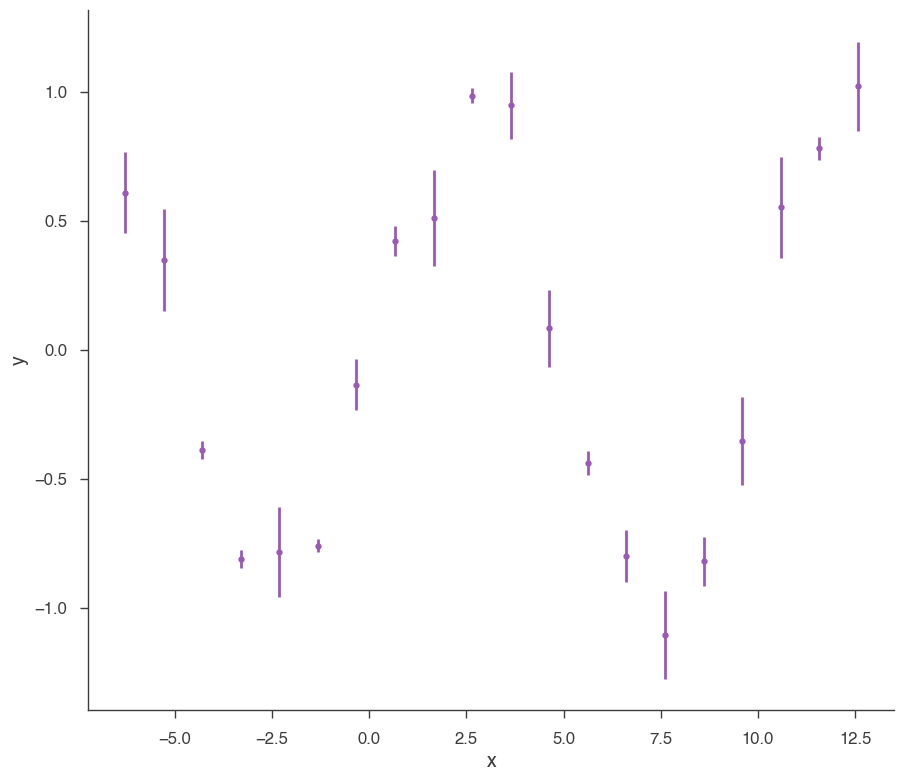

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=856023;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=449829;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

00:47:30 INFO      Mean acceptance fraction: 0.7181999999999998                                ]8;id=284799;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=642456;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

00:47:31 INFO      fit restored to maximum of posterior                                         ]8;id=544121;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=146644;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=517318;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=189529;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.16 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.448598
total,-9.448598


Values of statistical measures:

,statistical measures
AIC,23.603078
BIC,24.888660
DIC,22.754720
PDIC,1.927864


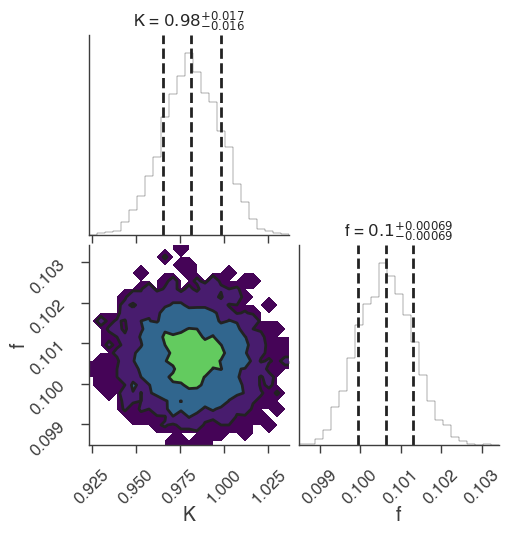

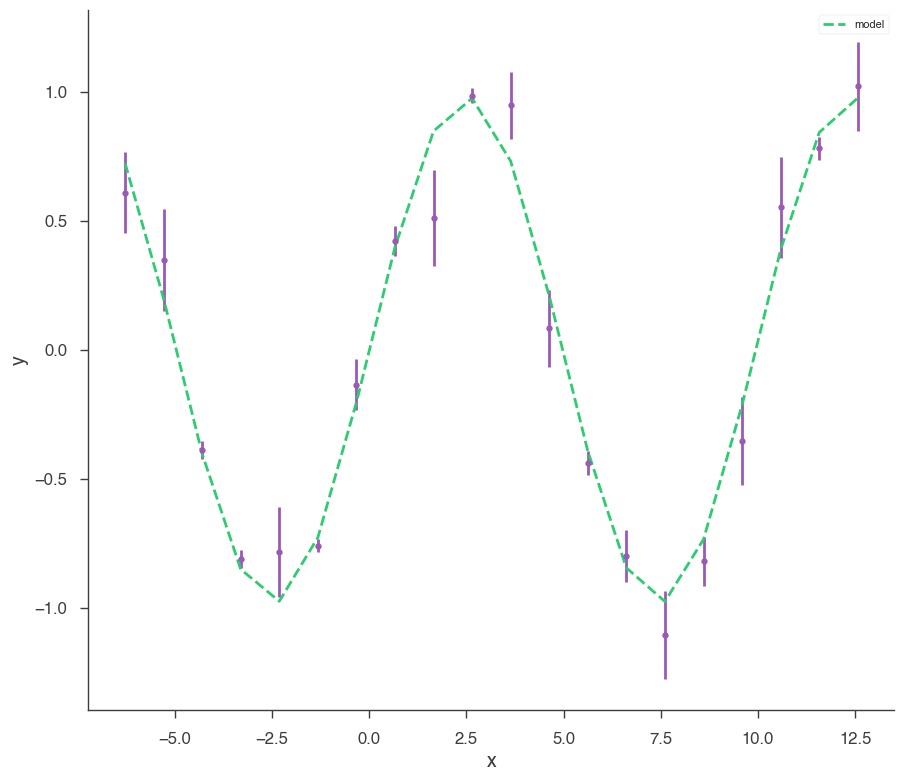

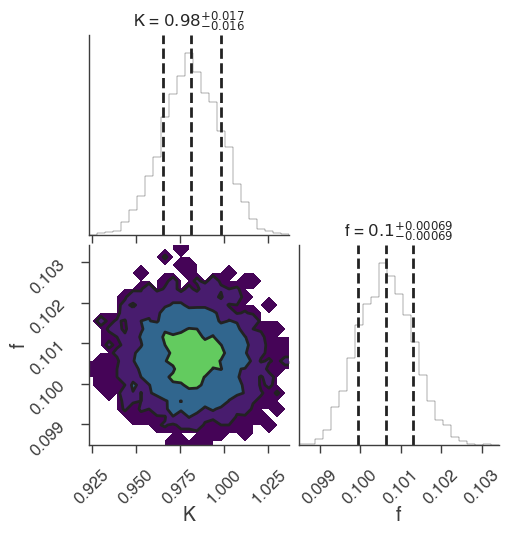

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

00:47:32 INFO      sampler set to multinest                                                ]8;id=637887;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=140568;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -18.195403711151460      +/-  0.13855157512845895     
 Total Likelihood Evaluations:         6017
 Sampling finished. Exiting MultiNest



00:47:34 INFO      fit restored to maximum of posterior                                         ]8;id=581756;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=575838;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=277459;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=756383;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.19 +0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.449937
total,-9.449937


Values of statistical measures:

,statistical measures
AIC,23.605756
BIC,24.891338
DIC,23.167641
PDIC,2.134194
log(Z),-7.902163


         INFO      deleting the chain directory chains                                     ]8;id=413257;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=11392;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

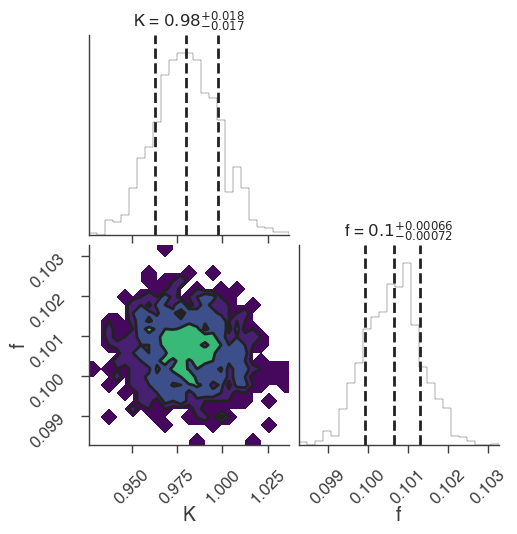

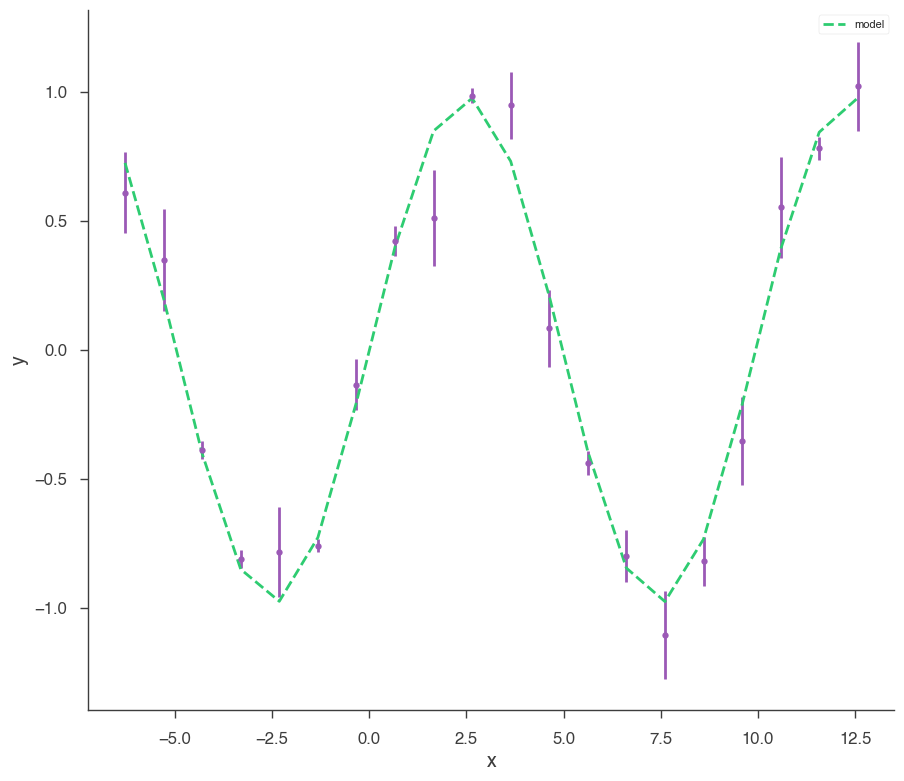

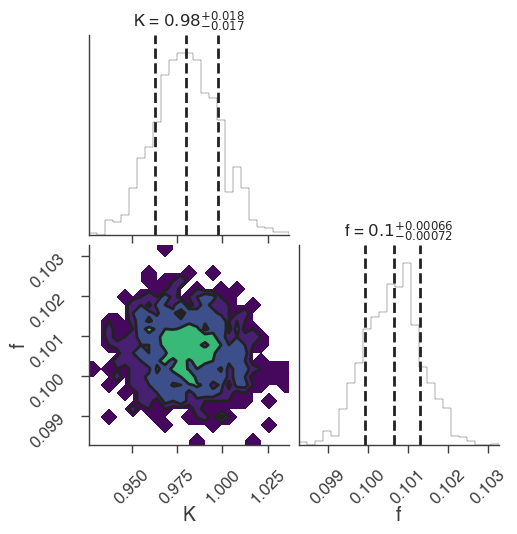

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

00:47:35 INFO      sampler set to dynesty_nested                                           ]8;id=946693;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=694574;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

174it [00:00, 1730.43it/s, bound: 0 | nc: 1 | ncall: 601 | eff(%): 28.952 | loglstar:   -inf < -2822.069 <    inf | logz: -2829.188 +/-  0.133 | dlogz: 2771.784 >  0.409]

348it [00:00, 1482.60it/s, bound: 0 | nc: 2 | ncall: 903 | eff(%): 38.538 | loglstar:   -inf < -2149.895 <    inf | logz: -2157.448 +/-  0.137 | dlogz: 2151.690 >  0.409]

499it [00:00, 1306.86it/s, bound: 0 | nc: 4 | ncall: 1323 | eff(%): 37.717 | loglstar:   -inf < -1811.362 <    inf | logz: -1819.245 +/-  0.138 | dlogz: 1811.009 >  0.409]

633it [00:00, 1122.19it/s, bound: 0 | nc: 8 | ncall: 1862 | eff(%): 33.996 | loglstar:   -inf < -1566.912 <    inf | logz: -1575.154 +/-  0.143 | dlogz: 1567.634 >  0.409]

749it [00:00, 1003.17it/s, bound: 0 | nc: 8 | ncall: 2380 | eff(%): 31.471 | loglstar:   -inf < -1345.755 <    inf | logz: -1353.060 +/-  0.129 | dlogz: 1341.583 >  0.409]

852it [00:00, 789.11it/s, bound: 0 | nc: 17 | ncall: 3114 | eff(%): 27.360 | loglstar:   -inf < -1257.490 <    inf | logz: -1264.253 +/-  0.124 | dlogz: 1252.180 >  0.409]

938it [00:01, 700.88it/s, bound: 0 | nc: 5 | ncall: 3822 | eff(%): 24.542 | loglstar:   -inf < -1038.708 <    inf | logz: -1047.735 +/-  0.150 | dlogz: 1045.731 >  0.409] 

1013it [00:01, 549.41it/s, bound: 0 | nc: 2 | ncall: 4652 | eff(%): 21.776 | loglstar:   -inf < -796.108 <    inf | logz: -805.133 +/-  0.146 | dlogz: 794.765 >  0.409]  

1075it [00:01, 493.91it/s, bound: 0 | nc: 5 | ncall: 5346 | eff(%): 20.108 | loglstar:   -inf < -659.086 <    inf | logz: -668.452 +/-  0.153 | dlogz: 661.796 >  0.409]

1129it [00:01, 426.80it/s, bound: 0 | nc: 9 | ncall: 6004 | eff(%): 18.804 | loglstar:   -inf < -546.274 <    inf | logz: -555.641 +/-  0.150 | dlogz: 545.110 >  0.409]

1175it [00:01, 373.51it/s, bound: 0 | nc: 25 | ncall: 6650 | eff(%): 17.669 | loglstar:   -inf < -467.499 <    inf | logz: -476.574 +/-  0.144 | dlogz: 464.709 >  0.409]

1215it [00:01, 339.67it/s, bound: 0 | nc: 15 | ncall: 7235 | eff(%): 16.793 | loglstar:   -inf < -417.284 <    inf | logz: -426.249 +/-  0.143 | dlogz: 413.959 >  0.409]

1251it [00:02, 299.36it/s, bound: 0 | nc: 76 | ncall: 7937 | eff(%): 15.762 | loglstar:   -inf < -383.519 <    inf | logz: -391.931 +/-  0.139 | dlogz: 379.238 >  0.409]

1282it [00:02, 259.52it/s, bound: 0 | nc: 15 | ncall: 8626 | eff(%): 14.862 | loglstar:   -inf < -348.147 <    inf | logz: -357.076 +/-  0.142 | dlogz: 344.452 >  0.409]

1309it [00:02, 248.17it/s, bound: 0 | nc: 2 | ncall: 9145 | eff(%): 14.314 | loglstar:   -inf < -328.678 <    inf | logz: -337.229 +/-  0.142 | dlogz: 324.355 >  0.409] 

1334it [00:02, 193.48it/s, bound: 0 | nc: 12 | ncall: 10076 | eff(%): 13.239 | loglstar:   -inf < -312.959 <    inf | logz: -320.913 +/-  0.135 | dlogz: 307.609 >  0.409]

1355it [00:02, 193.36it/s, bound: 0 | nc: 12 | ncall: 10524 | eff(%): 12.875 | loglstar:   -inf < -303.990 <    inf | logz: -312.279 +/-  0.136 | dlogz: 298.990 >  0.409]

1376it [00:02, 182.73it/s, bound: 0 | nc: 100 | ncall: 11128 | eff(%): 12.365 | loglstar:   -inf < -284.207 <    inf | logz: -292.954 +/-  0.143 | dlogz: 279.955 >  0.409]

1397it [00:03, 188.12it/s, bound: 0 | nc: 36 | ncall: 11506 | eff(%): 12.141 | loglstar:   -inf < -271.368 <    inf | logz: -280.904 +/-  0.147 | dlogz: 268.412 >  0.409] 

1417it [00:03, 180.13it/s, bound: 0 | nc: 4 | ncall: 11971 | eff(%): 11.837 | loglstar:   -inf < -261.421 <    inf | logz: -270.464 +/-  0.142 | dlogz: 257.392 >  0.409] 

1436it [00:03, 162.54it/s, bound: 0 | nc: 27 | ncall: 12522 | eff(%): 11.468 | loglstar:   -inf < -249.576 <    inf | logz: -258.046 +/-  0.141 | dlogz: 244.580 >  0.409]

1453it [00:03, 142.04it/s, bound: 0 | nc: 2 | ncall: 13128 | eff(%): 11.068 | loglstar:   -inf < -241.920 <    inf | logz: -251.641 +/-  0.146 | dlogz: 238.797 >  0.409] 

1468it [00:03, 136.10it/s, bound: 0 | nc: 1 | ncall: 13582 | eff(%): 10.808 | loglstar:   -inf < -233.835 <    inf | logz: -243.015 +/-  0.144 | dlogz: 229.820 >  0.409]

1482it [00:03, 129.88it/s, bound: 0 | nc: 18 | ncall: 14144 | eff(%): 10.478 | loglstar:   -inf < -224.950 <    inf | logz: -233.902 +/-  0.144 | dlogz: 220.590 >  0.409]

1496it [00:03, 120.37it/s, bound: 0 | nc: 41 | ncall: 14718 | eff(%): 10.164 | loglstar:   -inf < -218.808 <    inf | logz: -228.344 +/-  0.145 | dlogz: 215.158 >  0.409]

1509it [00:04, 87.15it/s, bound: 1 | nc: 1 | ncall: 15103 | eff(%):  9.991 | loglstar:   -inf < -210.144 <    inf | logz: -219.456 +/-  0.144 | dlogz: 206.055 >  0.409]  

1669it [00:04, 381.24it/s, bound: 1 | nc: 1 | ncall: 15374 | eff(%): 10.856 | loglstar:   -inf < -139.638 <    inf | logz: -148.839 +/-  0.145 | dlogz: 135.374 >  0.409]

1789it [00:04, 558.85it/s, bound: 1 | nc: 2 | ncall: 15609 | eff(%): 11.461 | loglstar:   -inf < -108.553 <    inf | logz: -117.728 +/-  0.144 | dlogz: 104.037 >  0.409]

1864it [00:04, 447.20it/s, bound: 2 | nc: 2 | ncall: 15738 | eff(%): 11.844 | loglstar:   -inf < -91.820 <    inf | logz: -100.715 +/-  0.143 | dlogz: 86.710 >  0.409]  

2044it [00:04, 717.76it/s, bound: 2 | nc: 2 | ncall: 15993 | eff(%): 12.781 | loglstar:   -inf < -64.964 <    inf | logz: -73.733 +/-  0.141 | dlogz: 59.191 >  0.409] 

2160it [00:04, 813.87it/s, bound: 2 | nc: 8 | ncall: 16263 | eff(%): 13.282 | loglstar:   -inf < -52.869 <    inf | logz: -62.073 +/-  0.141 | dlogz: 47.244 >  0.409]

2263it [00:05, 638.96it/s, bound: 3 | nc: 1 | ncall: 16408 | eff(%): 13.792 | loglstar:   -inf < -43.689 <    inf | logz: -52.624 +/-  0.141 | dlogz: 37.506 >  0.409]

2411it [00:05, 808.41it/s, bound: 3 | nc: 1 | ncall: 16627 | eff(%): 14.501 | loglstar:   -inf < -32.603 <    inf | logz: -42.009 +/-  0.144 | dlogz: 26.526 >  0.409]

2521it [00:05, 639.29it/s, bound: 4 | nc: 1 | ncall: 16900 | eff(%): 14.917 | loglstar:   -inf < -26.385 <    inf | logz: -35.518 +/-  0.144 | dlogz: 19.761 >  0.409]

2693it [00:05, 844.11it/s, bound: 4 | nc: 1 | ncall: 17148 | eff(%): 15.704 | loglstar:   -inf < -20.318 <    inf | logz: -29.318 +/-  0.142 | dlogz: 13.113 >  0.409]

2824it [00:05, 943.00it/s, bound: 4 | nc: 3 | ncall: 17406 | eff(%): 16.224 | loglstar:   -inf < -17.160 <    inf | logz: -26.299 +/-  0.142 | dlogz:  9.762 >  0.409]

2941it [00:05, 741.49it/s, bound: 5 | nc: 1 | ncall: 17595 | eff(%): 16.715 | loglstar:   -inf < -15.275 <    inf | logz: -24.373 +/-  0.142 | dlogz:  7.539 >  0.409]

3097it [00:05, 903.71it/s, bound: 5 | nc: 1 | ncall: 17843 | eff(%): 17.357 | loglstar:   -inf < -13.405 <    inf | logz: -22.510 +/-  0.142 | dlogz:  5.319 >  0.409]

3211it [00:06, 884.62it/s, bound: 5 | nc: 2 | ncall: 18086 | eff(%): 17.754 | loglstar:   -inf < -12.546 <    inf | logz: -21.597 +/-  0.142 | dlogz:  4.129 >  0.409]

3316it [00:06, 618.06it/s, bound: 6 | nc: 1 | ncall: 18231 | eff(%): 18.189 | loglstar:   -inf < -11.843 <    inf | logz: -20.933 +/-  0.142 | dlogz:  3.226 >  0.409]

3455it [00:06, 755.23it/s, bound: 6 | nc: 2 | ncall: 18443 | eff(%): 18.733 | loglstar:   -inf < -11.075 <    inf | logz: -20.230 +/-  0.142 | dlogz:  2.247 >  0.409]

3559it [00:06, 811.70it/s, bound: 6 | nc: 2 | ncall: 18678 | eff(%): 19.055 | loglstar:   -inf < -10.710 <    inf | logz: -19.847 +/-  0.142 | dlogz:  1.694 >  0.409]

3660it [00:06, 623.35it/s, bound: 7 | nc: 1 | ncall: 18810 | eff(%): 19.458 | loglstar:   -inf < -10.449 <    inf | logz: -19.566 +/-  0.142 | dlogz:  1.283 >  0.409]

3805it [00:06, 779.41it/s, bound: 7 | nc: 1 | ncall: 19033 | eff(%): 19.992 | loglstar:   -inf < -10.145 <    inf | logz: -19.265 +/-  0.142 | dlogz:  0.855 >  0.409]

3917it [00:07, 851.35it/s, bound: 7 | nc: 5 | ncall: 19291 | eff(%): 20.305 | loglstar:   -inf < -9.984 <    inf | logz: -19.099 +/-  0.142 | dlogz:  0.623 >  0.409] 

4022it [00:07, 696.50it/s, bound: 8 | nc: 1 | ncall: 19417 | eff(%): 20.714 | loglstar:   -inf < -9.867 <    inf | logz: -18.980 +/-  0.142 | dlogz:  0.464 >  0.409]

4067it [00:07, 549.54it/s, +400 | bound: 8 | nc: 1 | ncall: 19882 | eff(%): 22.929 | loglstar:   -inf < -9.468 <    inf | logz: -18.585 +/-  0.142 | dlogz:  0.001 >  0.409]

00:47:43 INFO      fit restored to maximum of posterior                                         ]8;id=129209;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=476195;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=206804;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=742042;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 +/- 0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.448648
total,-9.448648


Values of statistical measures:

,statistical measures
AIC,23.603179
BIC,24.888761
DIC,22.880241
PDIC,1.991135
log(Z),-8.071261


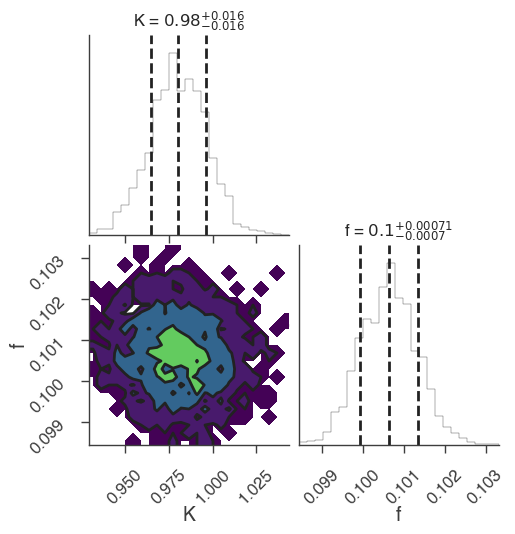

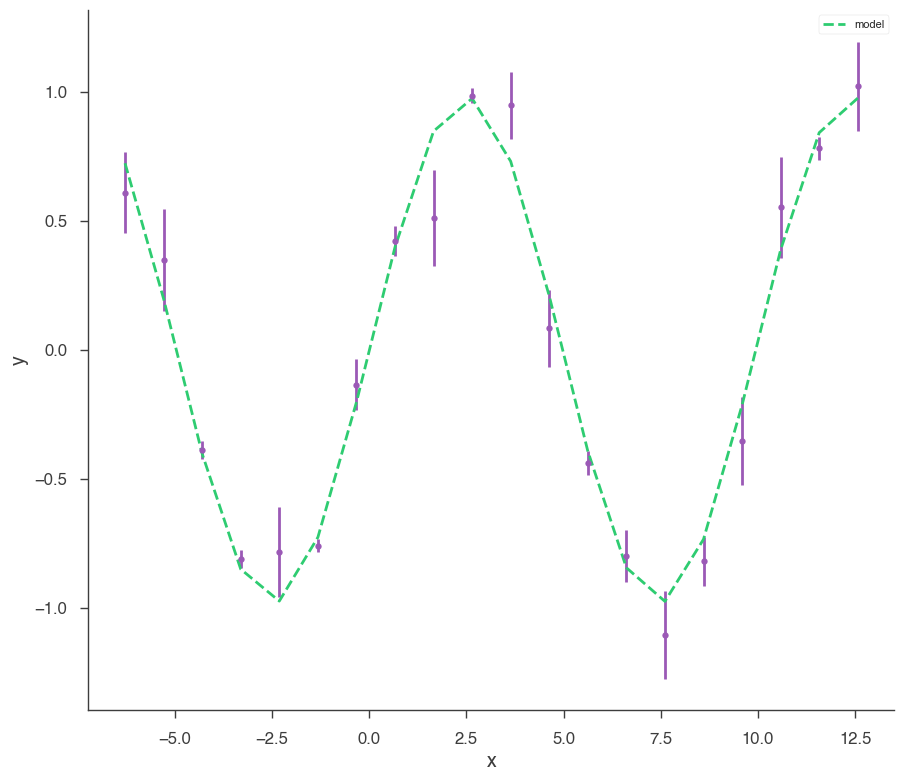

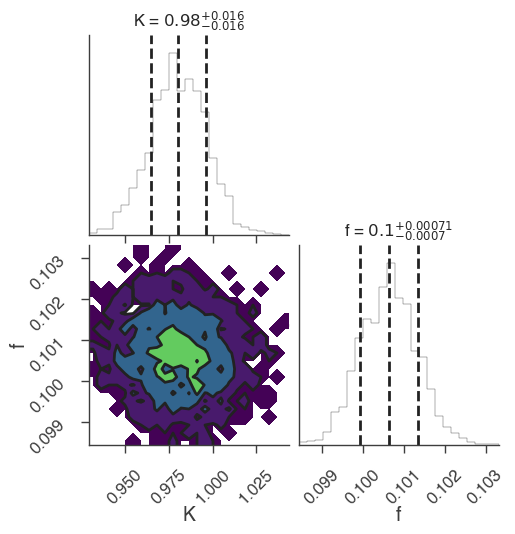

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

00:47:44 INFO      sampler set to dynesty_dynamic                                          ]8;id=295133;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=316025;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

11it [00:00, 109.99it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11 | eff(%):  2.153 | loglstar:   -inf < -5678.890 <    inf | logz: -5685.819 +/-  0.118 | dlogz: 5727.260 >  0.010]

198it [00:00, 1143.21it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 239 | eff(%): 26.793 | loglstar:   -inf < -2715.140 <    inf | logz: -2722.104 +/-  0.114 | dlogz: 2707.509 >  0.010]

343it [00:00, 1281.57it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 503 | eff(%): 34.197 | loglstar:   -inf < -2290.204 <    inf | logz: -2296.710 +/-  0.111 | dlogz: 2287.412 >  0.010]

472it [00:00, 1241.14it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 774 | eff(%): 37.049 | loglstar:   -inf < -1992.404 <    inf | logz: -1999.092 +/-  0.110 | dlogz: 1989.411 >  0.010]

597it [00:00, 1127.11it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1151 | eff(%): 36.160 | loglstar:   -inf < -1727.729 <    inf | logz: -1735.163 +/-  0.115 | dlogz: 1725.596 >  0.010]

712it [00:00, 998.15it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1596 | eff(%): 33.969 | loglstar:   -inf < -1453.544 <    inf | logz: -1461.266 +/-  0.116 | dlogz: 1451.307 >  0.010] 

815it [00:00, 922.46it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2065 | eff(%): 31.774 | loglstar:   -inf < -1348.001 <    inf | logz: -1355.900 +/-  0.116 | dlogz: 1345.647 >  0.010]

910it [00:00, 801.05it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 2575 | eff(%): 29.593 | loglstar:   -inf < -1262.285 <    inf | logz: -1269.015 +/-  0.109 | dlogz: 1257.943 >  0.010]

994it [00:01, 674.50it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3239 | eff(%): 26.585 | loglstar:   -inf < -1132.309 <    inf | logz: -1140.954 +/-  0.127 | dlogz: 1131.273 >  0.010]

1066it [00:01, 593.88it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3811 | eff(%): 24.727 | loglstar:   -inf < -866.107 <    inf | logz: -875.069 +/-  0.132 | dlogz: 866.440 >  0.010]  

1129it [00:01, 514.42it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 4444 | eff(%): 22.836 | loglstar:   -inf < -690.375 <    inf | logz: -699.514 +/-  0.134 | dlogz: 691.788 >  0.010]

1184it [00:01, 484.33it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 5013 | eff(%): 21.477 | loglstar:   -inf < -602.355 <    inf | logz: -610.993 +/-  0.124 | dlogz: 600.144 >  0.010] 

1235it [00:01, 386.77it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5736 | eff(%): 19.804 | loglstar:   -inf < -525.499 <    inf | logz: -534.509 +/-  0.128 | dlogz: 524.016 >  0.010]

1277it [00:02, 333.02it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 6439 | eff(%): 18.403 | loglstar:   -inf < -476.408 <    inf | logz: -484.216 +/-  0.119 | dlogz: 472.550 >  0.010]

1313it [00:02, 287.89it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 7064 | eff(%): 17.359 | loglstar:   -inf < -439.253 <    inf | logz: -447.471 +/-  0.124 | dlogz: 436.002 >  0.010]

1344it [00:02, 261.66it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7675 | eff(%): 16.440 | loglstar:   -inf < -409.384 <    inf | logz: -417.855 +/-  0.128 | dlogz: 406.639 >  0.010] 

1372it [00:02, 231.88it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 8350 | eff(%): 15.503 | loglstar:   -inf < -386.930 <    inf | logz: -394.904 +/-  0.120 | dlogz: 383.017 >  0.010]

1396it [00:02, 220.96it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 8851 | eff(%): 14.929 | loglstar:   -inf < -370.361 <    inf | logz: -378.945 +/-  0.126 | dlogz: 367.464 >  0.010]

1419it [00:02, 214.10it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 9270 | eff(%): 14.524 | loglstar:   -inf < -357.908 <    inf | logz: -366.054 +/-  0.121 | dlogz: 354.127 >  0.010]

1441it [00:02, 208.52it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 9664 | eff(%): 14.177 | loglstar:   -inf < -344.665 <    inf | logz: -353.753 +/-  0.126 | dlogz: 342.204 >  0.010] 

1462it [00:03, 197.10it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 10044 | eff(%): 13.866 | loglstar:   -inf < -332.587 <    inf | logz: -340.669 +/-  0.119 | dlogz: 328.519 >  0.010]

1482it [00:03, 190.21it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 10473 | eff(%): 13.506 | loglstar:   -inf < -317.409 <    inf | logz: -325.575 +/-  0.121 | dlogz: 313.446 >  0.010]

1501it [00:03, 184.19it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 10916 | eff(%): 13.148 | loglstar:   -inf < -303.054 <    inf | logz: -311.466 +/-  0.121 | dlogz: 299.351 >  0.010]

1520it [00:03, 166.71it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 11475 | eff(%): 12.693 | loglstar:   -inf < -295.565 <    inf | logz: -303.983 +/-  0.120 | dlogz: 291.807 >  0.010]

1539it [00:03, 168.54it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 11884 | eff(%): 12.427 | loglstar:   -inf < -284.379 <    inf | logz: -293.140 +/-  0.126 | dlogz: 281.133 >  0.010]

1562it [00:03, 181.44it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 12277 | eff(%): 12.225 | loglstar:   -inf < -274.160 <    inf | logz: -282.642 +/-  0.123 | dlogz: 270.420 >  0.010]

1584it [00:03, 185.56it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 12833 | eff(%): 11.880 | loglstar:   -inf < -265.319 <    inf | logz: -274.828 +/-  0.128 | dlogz: 263.120 >  0.010]

1603it [00:03, 170.42it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 13431 | eff(%): 11.507 | loglstar:   -inf < -253.449 <    inf | logz: -262.402 +/-  0.127 | dlogz: 250.419 >  0.010]

1621it [00:04, 161.85it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 13923 | eff(%): 11.239 | loglstar:   -inf < -243.756 <    inf | logz: -252.053 +/-  0.124 | dlogz: 239.636 >  0.010] 

1638it [00:04, 144.70it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 14539 | eff(%): 10.892 | loglstar:   -inf < -236.573 <    inf | logz: -245.252 +/-  0.124 | dlogz: 232.910 >  0.010]

1653it [00:04, 140.58it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 14990 | eff(%): 10.671 | loglstar:   -inf < -230.106 <    inf | logz: -238.316 +/-  0.122 | dlogz: 225.746 >  0.010]

1668it [00:04, 123.64it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 15641 | eff(%): 10.334 | loglstar:   -inf < -223.872 <    inf | logz: -232.320 +/-  0.124 | dlogz: 219.837 >  0.010]

1681it [00:04, 111.54it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 16233 | eff(%): 10.046 | loglstar:   -inf < -217.182 <    inf | logz: -225.959 +/-  0.126 | dlogz: 213.578 >  0.010]

1693it [00:04, 80.47it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16348 | eff(%): 10.049 | loglstar:   -inf < -214.681 <    inf | logz: -222.724 +/-  0.120 | dlogz: 210.023 >  0.010]  

1833it [00:04, 331.00it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 16532 | eff(%): 10.762 | loglstar:   -inf < -163.467 <    inf | logz: -171.951 +/-  0.121 | dlogz: 159.017 >  0.010]

1956it [00:05, 522.85it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16746 | eff(%): 11.342 | loglstar:   -inf < -133.295 <    inf | logz: -141.564 +/-  0.122 | dlogz: 128.319 >  0.010]

2061it [00:05, 645.68it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16998 | eff(%): 11.778 | loglstar:   -inf < -107.757 <    inf | logz: -116.155 +/-  0.123 | dlogz: 102.687 >  0.010]

2142it [00:05, 465.47it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17142 | eff(%): 12.141 | loglstar:   -inf < -93.399 <    inf | logz: -102.306 +/-  0.124 | dlogz: 88.716 >  0.010]  

2314it [00:05, 709.44it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 17388 | eff(%): 12.936 | loglstar:   -inf < -70.223 <    inf | logz: -78.654 +/-  0.122 | dlogz: 64.613 >  0.010] 

2462it [00:05, 876.55it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 17653 | eff(%): 13.562 | loglstar:   -inf < -53.994 <    inf | logz: -62.445 +/-  0.123 | dlogz: 48.095 >  0.010]

2575it [00:05, 626.08it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 17886 | eff(%): 14.005 | loglstar:   -inf < -44.423 <    inf | logz: -53.371 +/-  0.125 | dlogz: 38.820 >  0.010]

2746it [00:06, 825.76it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18146 | eff(%): 14.727 | loglstar:   -inf < -34.036 <    inf | logz: -42.964 +/-  0.124 | dlogz: 28.060 >  0.010]

2895it [00:06, 964.23it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18430 | eff(%): 15.293 | loglstar:   -inf < -27.637 <    inf | logz: -36.427 +/-  0.124 | dlogz: 21.211 >  0.010]

3020it [00:06, 662.02it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18658 | eff(%): 15.764 | loglstar:   -inf < -23.779 <    inf | logz: -32.241 +/-  0.124 | dlogz: 16.758 >  0.010]

3166it [00:06, 800.34it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18864 | eff(%): 16.350 | loglstar:   -inf < -19.950 <    inf | logz: -28.627 +/-  0.124 | dlogz: 12.850 >  0.010]

3304it [00:06, 914.85it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19125 | eff(%): 16.836 | loglstar:   -inf < -17.399 <    inf | logz: -26.111 +/-  0.124 | dlogz: 10.054 >  0.010]

3424it [00:07, 654.27it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19401 | eff(%): 17.205 | loglstar:   -inf < -15.574 <    inf | logz: -24.308 +/-  0.124 | dlogz:  8.008 >  0.010]

3586it [00:07, 822.26it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19640 | eff(%): 17.805 | loglstar:   -inf < -13.731 <    inf | logz: -22.454 +/-  0.124 | dlogz:  5.829 >  0.010]

3701it [00:07, 878.45it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19883 | eff(%): 18.157 | loglstar:   -inf < -12.856 <    inf | logz: -21.518 +/-  0.124 | dlogz:  4.668 >  0.010]

3815it [00:07, 605.13it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20105 | eff(%): 18.515 | loglstar:   -inf < -12.343 <    inf | logz: -20.864 +/-  0.123 | dlogz:  3.804 >  0.010]

3963it [00:07, 752.62it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20309 | eff(%): 19.045 | loglstar:   -inf < -11.542 <    inf | logz: -20.199 +/-  0.123 | dlogz:  2.877 >  0.010]

4086it [00:07, 845.26it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20519 | eff(%): 19.440 | loglstar:   -inf < -11.066 <    inf | logz: -19.745 +/-  0.123 | dlogz:  2.232 >  0.010]

4198it [00:07, 900.68it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20744 | eff(%): 19.761 | loglstar:   -inf < -10.737 <    inf | logz: -19.409 +/-  0.124 | dlogz:  1.749 >  0.010]

4309it [00:08, 606.96it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 20936 | eff(%): 20.102 | loglstar:   -inf < -10.469 <    inf | logz: -19.141 +/-  0.124 | dlogz:  1.364 >  0.010]

4444it [00:08, 737.59it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21138 | eff(%): 20.538 | loglstar:   -inf < -10.212 <    inf | logz: -18.889 +/-  0.124 | dlogz:  1.003 >  0.010]

4558it [00:08, 818.03it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21366 | eff(%): 20.845 | loglstar:   -inf < -10.063 <    inf | logz: -18.725 +/-  0.124 | dlogz:  0.773 >  0.010]

4664it [00:08, 583.54it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21613 | eff(%): 21.092 | loglstar:   -inf < -9.961 <    inf | logz: -18.604 +/-  0.124 | dlogz:  0.608 >  0.010] 

4817it [00:08, 750.00it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 21820 | eff(%): 21.582 | loglstar:   -inf < -9.838 <    inf | logz: -18.471 +/-  0.124 | dlogz:  0.431 >  0.010]

4935it [00:08, 836.08it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 22028 | eff(%): 21.906 | loglstar:   -inf < -9.760 <    inf | logz: -18.392 +/-  0.124 | dlogz:  0.332 >  0.010]

5052it [00:09, 909.95it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22273 | eff(%): 22.184 | loglstar:   -inf < -9.692 <    inf | logz: -18.331 +/-  0.124 | dlogz:  0.257 >  0.010]

5163it [00:09, 628.51it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22444 | eff(%): 22.503 | loglstar:   -inf < -9.641 <    inf | logz: -18.285 +/-  0.124 | dlogz:  0.202 >  0.010]

5291it [00:09, 747.96it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22646 | eff(%): 22.859 | loglstar:   -inf < -9.602 <    inf | logz: -18.242 +/-  0.124 | dlogz:  0.154 >  0.010]

5399it [00:09, 814.87it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 22855 | eff(%): 23.117 | loglstar:   -inf < -9.577 <    inf | logz: -18.214 +/-  0.124 | dlogz:  0.122 >  0.010]

5507it [00:09, 874.44it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23085 | eff(%): 23.350 | loglstar:   -inf < -9.560 <    inf | logz: -18.192 +/-  0.124 | dlogz:  0.098 >  0.010]

5611it [00:09, 620.59it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23208 | eff(%): 23.667 | loglstar:   -inf < -9.543 <    inf | logz: -18.174 +/-  0.124 | dlogz:  0.079 >  0.010]

5769it [00:10, 804.84it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 23460 | eff(%): 24.078 | loglstar:   -inf < -9.523 <    inf | logz: -18.154 +/-  0.124 | dlogz:  0.057 >  0.010]

5903it [00:10, 920.23it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 23749 | eff(%): 24.343 | loglstar:   -inf < -9.510 <    inf | logz: -18.141 +/-  0.124 | dlogz:  0.043 >  0.010]

6017it [00:10, 660.24it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 23924 | eff(%): 24.636 | loglstar:   -inf < -9.501 <    inf | logz: -18.132 +/-  0.124 | dlogz:  0.034 >  0.010]

6167it [00:10, 815.72it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24138 | eff(%): 25.030 | loglstar:   -inf < -9.493 <    inf | logz: -18.123 +/-  0.124 | dlogz:  0.025 >  0.010]

6285it [00:10, 890.08it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24349 | eff(%): 25.293 | loglstar:   -inf < -9.488 <    inf | logz: -18.118 +/-  0.124 | dlogz:  0.020 >  0.010]

6402it [00:10, 640.30it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24597 | eff(%): 25.509 | loglstar:   -inf < -9.484 <    inf | logz: -18.114 +/-  0.124 | dlogz:  0.016 >  0.010]

6574it [00:11, 835.30it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24814 | eff(%): 25.970 | loglstar:   -inf < -9.480 <    inf | logz: -18.110 +/-  0.124 | dlogz:  0.011 >  0.010]

6895it [00:11, 1322.14it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25161 | eff(%): 27.152 | loglstar:   -inf < -9.473 <    inf | logz: -18.103 +/-  0.124 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7128it [00:12, 480.73it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 25394 | eff(%): 28.070 | loglstar: -11.242 < -10.251 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619]          

7258it [00:12, 553.94it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25543 | eff(%): 27.847 | loglstar: -11.242 < -10.838 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619]

7401it [00:12, 654.44it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 25771 | eff(%): 28.149 | loglstar: -11.242 < -10.505 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619]

7546it [00:12, 766.59it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 26043 | eff(%): 28.407 | loglstar: -11.242 < -10.268 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619]

7683it [00:12, 619.43it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26249 | eff(%): 28.700 | loglstar: -11.242 < -10.066 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619]

7958it [00:13, 930.42it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26578 | eff(%): 29.578 | loglstar: -11.242 < -9.777 < -9.963 | logz: -18.099 +/-  0.127 | stop:  1.619] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8273it [00:14, 429.38it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 26905 | eff(%): 30.749 | loglstar: -11.692 < -10.045 < -11.236 | logz: -18.111 +/-  0.104 | stop:  1.112]

8415it [00:14, 503.21it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27075 | eff(%): 30.471 | loglstar: -11.692 < -11.157 < -11.236 | logz: -18.111 +/-  0.104 | stop:  1.112]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8889it [00:15, 410.98it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 27616 | eff(%): 32.188 | loglstar: -12.106 < -9.499 < -11.690 | logz: -18.124 +/-  0.098 | stop:  1.065] 

9074it [00:15, 495.00it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 27815 | eff(%): 32.118 | loglstar: -12.106 < -11.207 < -11.690 | logz: -18.124 +/-  0.098 | stop:  1.065]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9469it [00:16, 486.50it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28252 | eff(%): 33.516 | loglstar: -12.106 < -9.468 < -11.690 | logz: -18.124 +/-  0.098 | stop:  0.973] 

9469it [00:16, 566.46it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28252 | eff(%): 33.516 | loglstar: -12.106 < -9.468 < -11.690 | logz: -18.124 +/-  0.098 | stop:  0.973]

00:48:01 INFO      fit restored to maximum of posterior                                         ]8;id=943664;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=183147;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=113525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=822873;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 +/- 0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.448462
total,-9.448462


Values of statistical measures:

,statistical measures
AIC,23.602806
BIC,24.888388
DIC,22.925799
PDIC,2.013694
log(Z),-7.869028


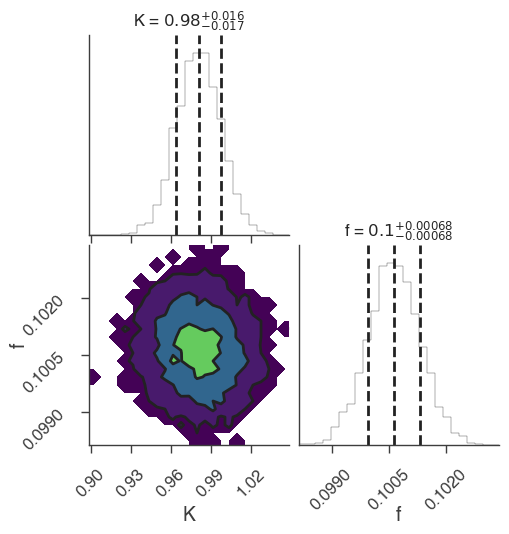

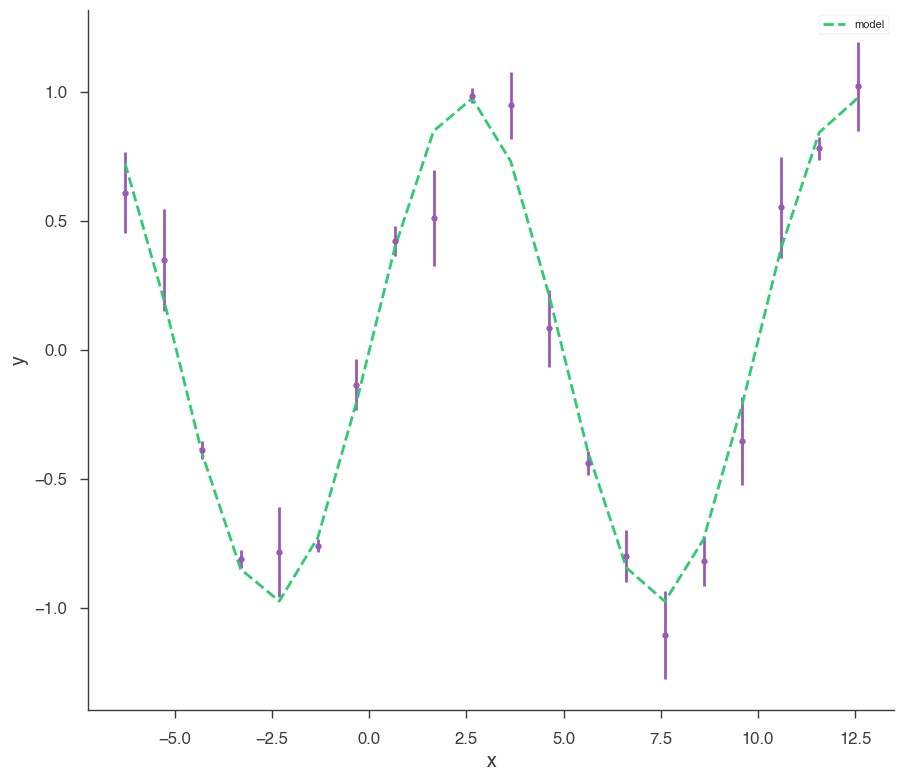

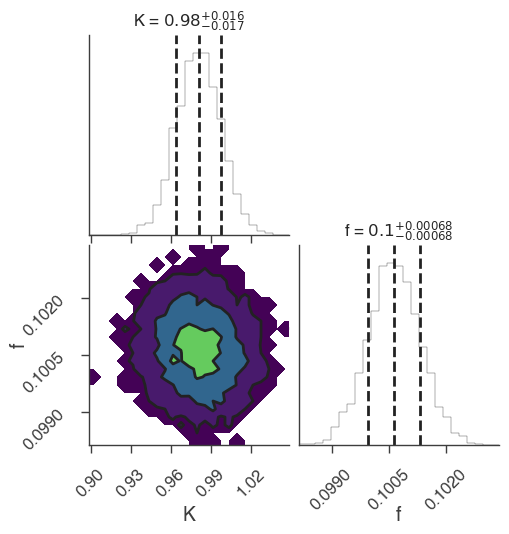

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

00:48:02 INFO      sampler set to zeus                                                     ]8;id=576324;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=915690;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:20, 30.19it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:21, 28.91it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:19, 31.44it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:18, 33.12it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:17, 34.06it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:16, 35.43it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:16, 36.46it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:18, 31.62it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:18, 31.58it/s]

Sampling progress :   6%|▋         | 40/625 [00:01<00:17, 33.16it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:18, 31.51it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:17, 33.12it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:17, 33.23it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:16, 34.69it/s]

Sampling progress :  10%|▉         | 60/625 [00:01<00:16, 34.43it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:16, 33.20it/s]

Sampling progress :  11%|█         | 68/625 [00:02<00:16, 33.83it/s]

Sampling progress :  12%|█▏        | 72/625 [00:02<00:16, 34.19it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:15, 34.45it/s]

Sampling progress :  13%|█▎        | 81/625 [00:02<00:14, 36.82it/s]

Sampling progress :  14%|█▎        | 85/625 [00:02<00:15, 35.52it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:15, 35.40it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:15, 35.32it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:14, 36.45it/s]

Sampling progress :  16%|█▌        | 101/625 [00:02<00:14, 35.50it/s]

Sampling progress :  17%|█▋        | 105/625 [00:03<00:14, 34.73it/s]

Sampling progress :  17%|█▋        | 109/625 [00:03<00:15, 33.84it/s]

Sampling progress :  18%|█▊        | 113/625 [00:03<00:15, 33.71it/s]

Sampling progress :  19%|█▊        | 117/625 [00:03<00:15, 33.25it/s]

Sampling progress :  19%|█▉        | 121/625 [00:03<00:15, 32.80it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:14, 35.45it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:13, 35.65it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:13, 35.78it/s]

Sampling progress :  22%|██▏       | 138/625 [00:04<00:13, 35.64it/s]

Sampling progress :  23%|██▎       | 142/625 [00:04<00:13, 36.37it/s]

Sampling progress :  24%|██▎       | 147/625 [00:04<00:12, 38.20it/s]

Sampling progress :  24%|██▍       | 151/625 [00:04<00:14, 33.21it/s]

Sampling progress :  25%|██▍       | 155/625 [00:04<00:13, 34.51it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:13, 35.39it/s]

Sampling progress :  26%|██▌       | 164/625 [00:04<00:12, 37.16it/s]

Sampling progress :  27%|██▋       | 168/625 [00:04<00:12, 37.77it/s]

Sampling progress :  28%|██▊       | 172/625 [00:04<00:12, 37.09it/s]

Sampling progress :  28%|██▊       | 176/625 [00:05<00:14, 30.54it/s]

Sampling progress :  29%|██▉       | 180/625 [00:05<00:13, 32.05it/s]

Sampling progress :  29%|██▉       | 184/625 [00:05<00:13, 33.73it/s]

Sampling progress :  30%|███       | 189/625 [00:05<00:12, 34.67it/s]

Sampling progress :  31%|███       | 193/625 [00:05<00:13, 32.74it/s]

Sampling progress :  32%|███▏      | 197/625 [00:05<00:13, 32.74it/s]

Sampling progress :  32%|███▏      | 201/625 [00:05<00:13, 31.68it/s]

Sampling progress :  33%|███▎      | 205/625 [00:06<00:13, 31.92it/s]

Sampling progress :  33%|███▎      | 209/625 [00:06<00:13, 31.00it/s]

Sampling progress :  34%|███▍      | 213/625 [00:06<00:12, 32.88it/s]

Sampling progress :  35%|███▍      | 217/625 [00:06<00:12, 33.86it/s]

Sampling progress :  35%|███▌      | 221/625 [00:06<00:11, 35.16it/s]

Sampling progress :  36%|███▌      | 225/625 [00:06<00:11, 35.32it/s]

Sampling progress :  37%|███▋      | 230/625 [00:06<00:10, 37.35it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:10, 36.74it/s]

Sampling progress :  38%|███▊      | 238/625 [00:06<00:11, 35.14it/s]

Sampling progress :  39%|███▊      | 242/625 [00:07<00:11, 34.62it/s]

Sampling progress :  39%|███▉      | 246/625 [00:07<00:11, 33.67it/s]

Sampling progress :  40%|████      | 250/625 [00:07<00:11, 32.80it/s]

Sampling progress :  41%|████      | 254/625 [00:07<00:12, 30.68it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:11, 31.43it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:10, 33.22it/s]

Sampling progress :  43%|████▎     | 267/625 [00:07<00:10, 35.74it/s]

Sampling progress :  43%|████▎     | 271/625 [00:07<00:09, 36.52it/s]

Sampling progress :  44%|████▍     | 276/625 [00:08<00:09, 37.11it/s]

Sampling progress :  45%|████▍     | 280/625 [00:08<00:10, 33.98it/s]

Sampling progress :  45%|████▌     | 284/625 [00:08<00:09, 34.73it/s]

Sampling progress :  46%|████▌     | 288/625 [00:08<00:09, 34.75it/s]

Sampling progress :  47%|████▋     | 292/625 [00:08<00:09, 35.34it/s]

Sampling progress :  47%|████▋     | 296/625 [00:08<00:09, 35.09it/s]

Sampling progress :  48%|████▊     | 300/625 [00:08<00:09, 34.63it/s]

Sampling progress :  49%|████▊     | 304/625 [00:08<00:09, 33.60it/s]

Sampling progress :  49%|████▉     | 308/625 [00:09<00:09, 33.20it/s]

Sampling progress :  50%|████▉     | 312/625 [00:09<00:09, 33.81it/s]

Sampling progress :  51%|█████     | 316/625 [00:09<00:08, 34.86it/s]

Sampling progress :  51%|█████     | 320/625 [00:09<00:08, 35.33it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:09<00:08, 34.73it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:09<00:08, 33.78it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:09<00:08, 33.67it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:09<00:08, 32.33it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:09<00:09, 31.23it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:10<00:08, 32.34it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:10<00:08, 32.77it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:10<00:08, 32.51it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:10<00:08, 32.99it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:10<00:07, 33.46it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:10<00:08, 32.46it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:10<00:07, 33.48it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:10<00:07, 33.49it/s]

Sampling progress :  60%|██████    | 376/625 [00:11<00:07, 33.96it/s]

Sampling progress :  61%|██████    | 380/625 [00:11<00:06, 35.02it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:11<00:06, 34.43it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:11<00:06, 35.39it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:11<00:06, 34.47it/s]

Sampling progress :  63%|██████▎   | 396/625 [00:11<00:06, 34.91it/s]

Sampling progress :  64%|██████▍   | 400/625 [00:11<00:06, 34.59it/s]

Sampling progress :  65%|██████▍   | 404/625 [00:11<00:06, 34.56it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:11<00:06, 32.30it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:12<00:06, 33.78it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:12<00:05, 34.89it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:12<00:05, 36.70it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:12<00:05, 36.73it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:12<00:05, 37.51it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:12<00:05, 37.24it/s]

Sampling progress :  70%|███████   | 438/625 [00:12<00:04, 38.04it/s]

Sampling progress :  71%|███████   | 442/625 [00:12<00:04, 37.53it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:13<00:04, 36.60it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:13<00:04, 36.29it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:13<00:04, 36.53it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:13<00:04, 35.20it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:13<00:04, 35.89it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:13<00:04, 35.46it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:13<00:04, 34.81it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:13<00:04, 34.04it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:13<00:04, 34.87it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:14<00:04, 32.60it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:14<00:04, 31.88it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:14<00:04, 33.22it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:14<00:03, 33.60it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:14<00:03, 33.06it/s]

Sampling progress :  80%|████████  | 503/625 [00:14<00:03, 35.04it/s]

Sampling progress :  81%|████████  | 507/625 [00:14<00:03, 35.01it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:14<00:03, 32.61it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:15<00:03, 31.50it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:15<00:03, 32.58it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:15<00:02, 34.95it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:15<00:02, 35.34it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:15<00:02, 33.68it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:15<00:02, 33.28it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:15<00:02, 34.26it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:15<00:02, 36.19it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:16<00:02, 36.89it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:16<00:02, 35.70it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:16<00:01, 35.73it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:16<00:01, 36.19it/s]

Sampling progress :  90%|█████████ | 565/625 [00:16<00:01, 35.88it/s]

Sampling progress :  91%|█████████ | 569/625 [00:16<00:01, 34.64it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:16<00:01, 35.99it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:16<00:01, 35.06it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:16<00:01, 34.80it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:17<00:01, 32.60it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:17<00:01, 32.35it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:17<00:00, 33.03it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:17<00:00, 32.20it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:17<00:00, 33.52it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:17<00:00, 34.44it/s]

Sampling progress :  97%|█████████▋| 609/625 [00:17<00:00, 35.74it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:17<00:00, 35.64it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:17<00:00, 34.98it/s]

Sampling progress :  99%|█████████▉| 621/625 [00:18<00:00, 33.73it/s]

Sampling progress : 100%|██████████| 625/625 [00:18<00:00, 32.69it/s]

Sampling progress : 100%|██████████| 625/625 [00:18<00:00, 34.26it/s]

00:48:22 INFO      fit restored to maximum of posterior                                         ]8;id=359620;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=791552;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=326217;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=957118;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 12


Scale Factor: 0.927397


Mean Integrated Autocorrelation Time: 3.02


Effective Sample Size: 4139.24


Number of Log Probability Evaluations: 67289


Effective Samples per Log Probability Evaluation: 0.061514


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 +/- 0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 -0.006 +0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.448532
total,-9.448532


Values of statistical measures:

,statistical measures
AIC,23.602947
BIC,24.888529
DIC,22.707352
PDIC,1.904696


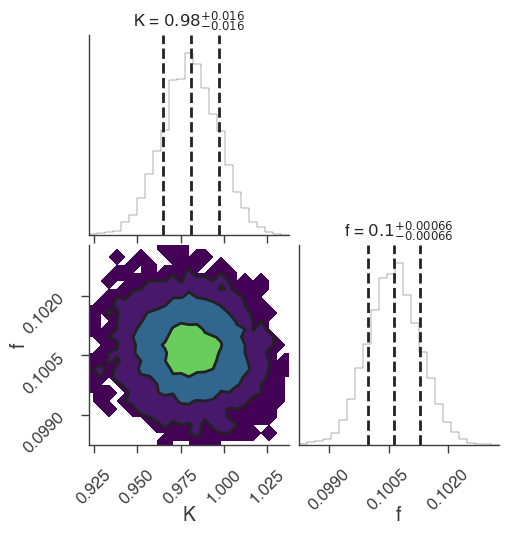

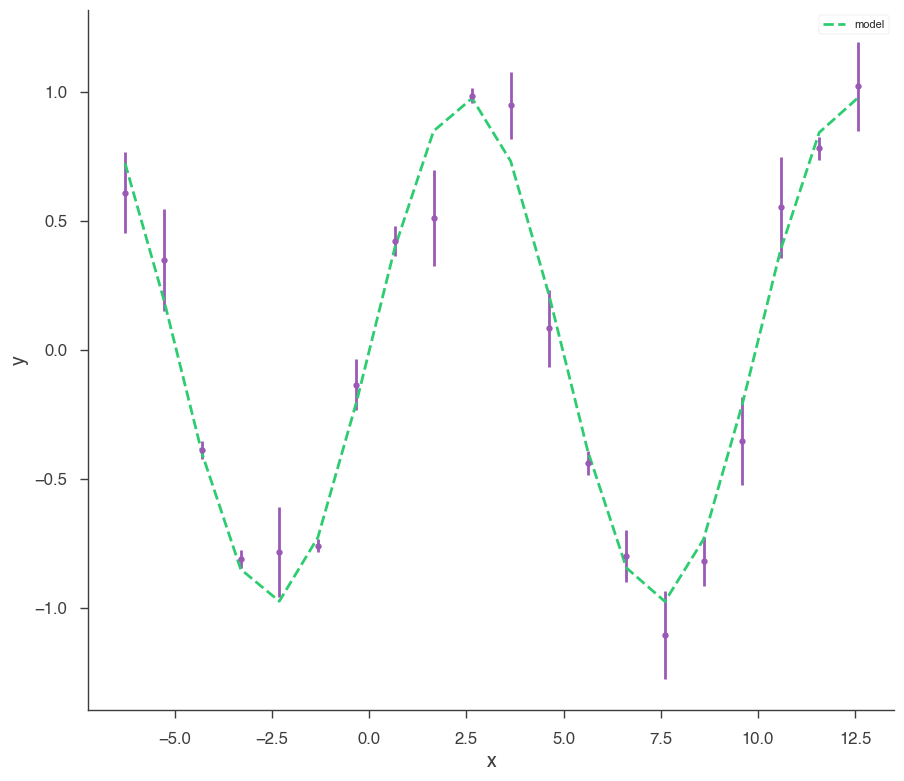

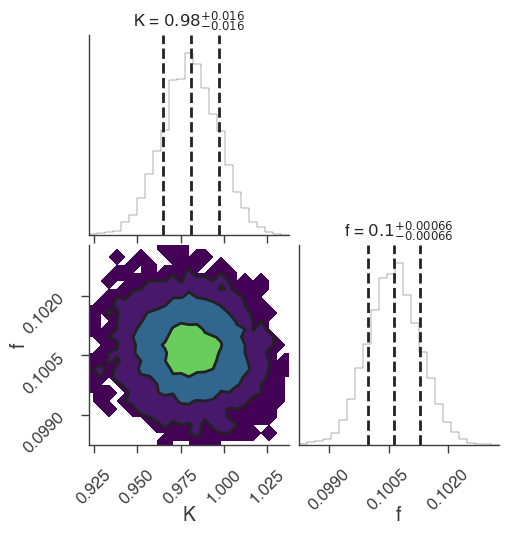

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

00:48:23 INFO      sampler set to ultranest                                                ]8;id=867699;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=101344;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 6061


[ultranest]   logZ = -18.34 +- 0.0915


[ultranest] Effective samples strategy satisfied (ESS = 992.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.09 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


00:48:33 INFO      fit restored to maximum of posterior                                         ]8;id=630159;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=593236;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=77800;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=309778;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.16 +0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.007 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.451467
total,-9.451467


Values of statistical measures:

,statistical measures
AIC,23.608817
BIC,24.894399
DIC,22.905405
PDIC,2.000234
log(Z),-7.961069


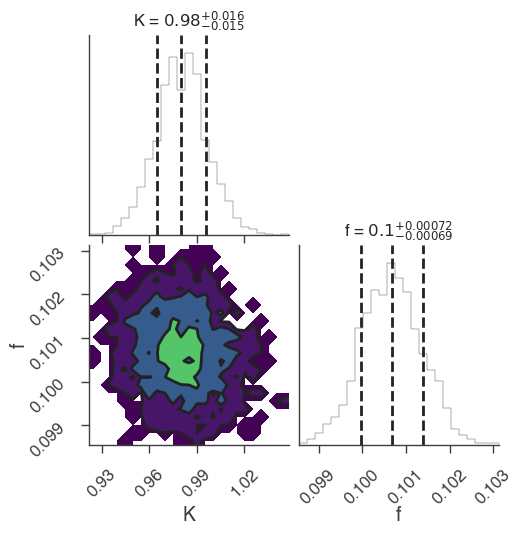

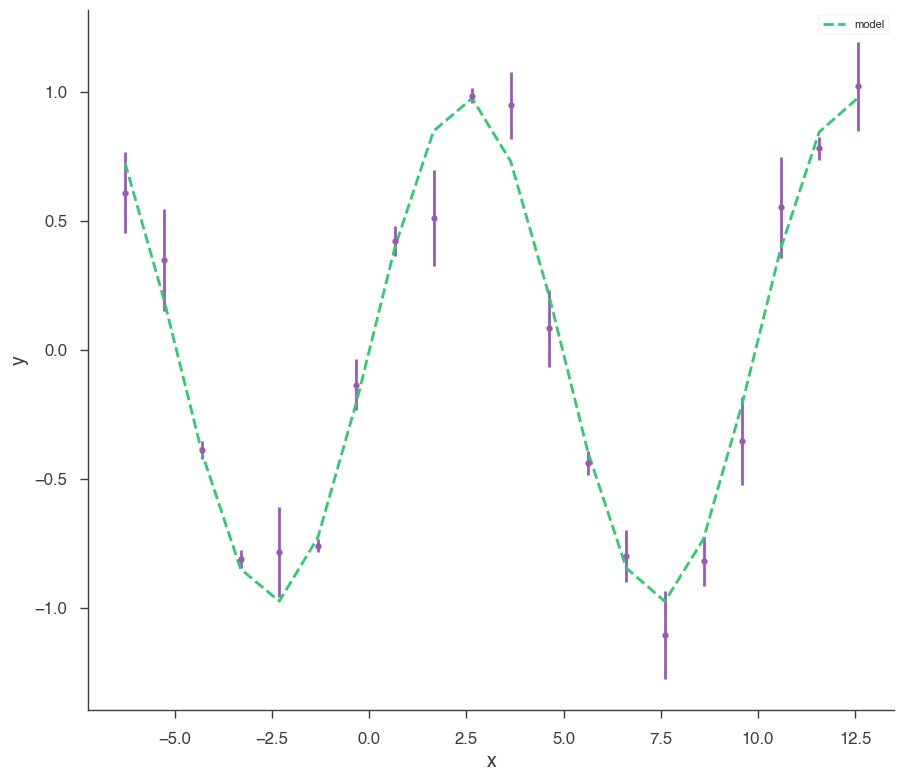

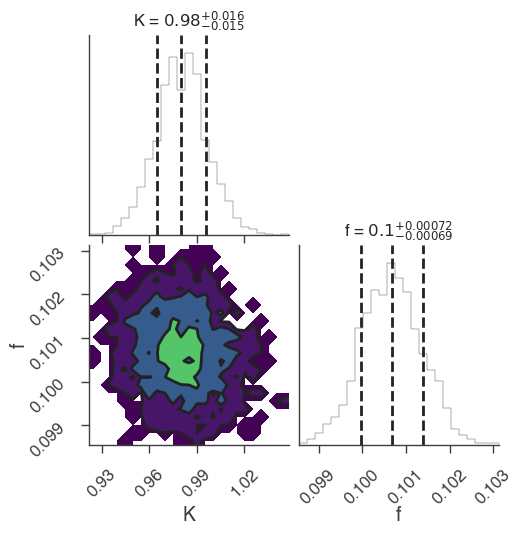

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()